In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Acquire

### 10 year treasury yield

In [56]:
ten_year_treasury_yield = pd.read_csv('10_year_treasury_yield_nonseasonal_weekly.csv')

In [84]:
ten_year_treasury_yield.rename(columns={'WGS10YR':'10YR_treasury_yield'}, inplace=True)
ten_year_treasury_yield.head()

,DATE,10YR_treasury_yield
0,1962-01-05,4.03
1,1962-01-12,4.06
2,1962-01-19,4.11
3,1962-01-26,4.10
4,1962-02-02,4.10


In [117]:
ten_year_treasury_yield.DATE = pd.to_datetime(ten_year_treasury_yield.DATE)

In [54]:
# corporate tax receipts
corporate_tax_receipts = pd.read_csv('corporate_tax_receipts_quarterly_nonseasonal_millions.csv')

In [85]:
corporate_tax_receipts.rename(columns={'NA000322Q':'corporate_tax_receipts'}, inplace=True)
corporate_tax_receipts.head()

,DATE,corporate_tax_receipts
0,1947-01-01,2561.0
1,1947-04-01,2518.0
2,1947-07-01,2563.0
3,1947-10-01,2947.0
4,1948-01-01,2660.0


In [86]:
# CPI all items
# not using
cpi_all_items = pd.read_csv('CPI_allitems_nonseasonaladjusted.csv')
cpi_all_items.head()

,CPI for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# CPI less food and energy
cpi_less_food_energy = pd.read_csv('cpi_lessfoodenergy_fred.csv')

In [87]:
cpi_less_food_energy.rename(columns={'CPILFENS':'cpi_less_food_energy'}, inplace=True)
cpi_less_food_energy.head()

,DATE,cpi_less_food_energy
0,1957-01-01,28.5
1,1957-02-01,28.5
2,1957-03-01,28.7
3,1957-04-01,28.8
4,1957-05-01,28.8


In [114]:
cpi_less_food_energy.DATE = pd.to_datetime(cpi_less_food_energy.DATE)

In [50]:
# CPI rate of change
cpi_rate = pd.read_csv('cpi_rate_total_monthly_percent.csv')

In [88]:
cpi_rate.rename(columns={'CPALTT01USM659N':'cpi_rate'}, inplace=True)
cpi_rate.head()

,DATE,cpi_rate
0,1960-01-01,1.034483
1,1960-02-01,1.730104
2,1960-03-01,1.730104
3,1960-04-01,1.724138
4,1960-05-01,1.724138


In [112]:
cpi_rate.DATE = pd.to_datetime(cpi_rate.DATE)

In [48]:
# federal debt
federal_debt = pd.read_csv('federal_debt_quarterly_millions.csv')

In [89]:
federal_debt.rename(columns={'GFDEBTN':'federal_debt'}, inplace=True)
federal_debt.head()

,DATE,federal_debt
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0


In [46]:
# federal funds rate
federal_funds_rate = pd.read_csv('federal_funds_rate_daily.csv')

In [90]:
federal_funds_rate.rename(columns={'DFF':'fed_funds_rate'}, inplace=True)
federal_funds_rate.head()

,DATE,fed_funds_rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [119]:
# monetary base
monetary_base = pd.read_csv('FRB_H3_monthly.csv')

In [121]:
monetary_base.rename(columns={'Date':'DATE',
                              'Monetary base; total; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted':'monetary_base_total',
                              'Monetary base; total balances maintained; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted':'monetary_base_total_balances_maintained',
                              'Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted':'monetary_base_circulation'},
                     inplace=True)
monetary_base.head()

,DATE,monetary_base_total,monetary_base_total_balances_maintained,"Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted"
0,Unit:,Currency,Currency,Currency
1,Multiplier:,1000000,1000000,1000000
2,Currency:,USD,USD,USD
3,Unique Identifier:,H3/H3/RESMO14A_N.M,H3/H3/RESMOB14A_N.M,H3/H3/RESMOC14A_N.M
4,Time Period,RESMO14A_N.M,RESMOB14A_N.M,RESMOC14A_N.M


In [126]:
monetary_base.rename(columns={'Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted':'monetary_base_circulation'}, inplace=True)

In [127]:
monetary_base.head(10)

,DATE,monetary_base_total,monetary_base_total_balances_maintained,"Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted"
0,Unit:,Currency,Currency,Currency
1,Multiplier:,1000000,1000000,1000000
2,Currency:,USD,USD,USD
3,Unique Identifier:,H3/H3/RESMO14A_N.M,H3/H3/RESMOB14A_N.M,H3/H3/RESMOC14A_N.M
4,Time Period,RESMO14A_N.M,RESMOB14A_N.M,RESMOC14A_N.M
5,1959-01,50463,18886,31573
6,1959-02,49805,18576,31234
7,1959-03,49733,18432,31301
8,1959-04,50058,18678,31379
9,1959-05,50112,18553,31559


In [129]:
monetary_base.drop([0,1,2,3,4], inplace=True)
monetary_base.head()

,DATE,monetary_base_total,monetary_base_total_balances_maintained,"Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted"
5,1959-01,50463,18886,31573
6,1959-02,49805,18576,31234
7,1959-03,49733,18432,31301
8,1959-04,50058,18678,31379
9,1959-05,50112,18553,31559


In [131]:
date_test = monetary_base.DATE

In [133]:
date_test = date_test+'-01'

In [134]:
date_test

5      1959-01-01
6      1959-02-01
7      1959-03-01
8      1959-04-01
9      1959-05-01
          ...    
740    2020-04-01
741    2020-05-01
742    2020-06-01
743    2020-07-01
744    2020-08-01
Name: DATE, Length: 740, dtype: object

In [135]:
monetary_base.DATE = monetary_base.DATE+'-01'

In [136]:
monetary_base

,DATE,monetary_base_total,monetary_base_total_balances_maintained,"Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted"
5,1959-01-01,50463,18886,31573
6,1959-02-01,49805,18576,31234
7,1959-03-01,49733,18432,31301
8,1959-04-01,50058,18678,31379
9,1959-05-01,50112,18553,31559
...,...,...,...,...
740,2020-04-01,4844940,2953586,1891355
741,2020-05-01,5149527,3217635,1931891
742,2020-06-01,5001978,3043556,1958422
743,2020-07-01,4700365,2718529,1981836


In [138]:
monetary_base.DATE = pd.to_datetime(monetary_base.DATE)

In [42]:
# GDP
gdp = pd.read_csv('gdp_quartery_nonseasonal_millions.csv')

In [92]:
gdp.rename(columns = {'NA000334Q':'gdp'}, inplace=True)
gdp.head()

,DATE,gdp
0,1947-01-01,58497.0
1,1947-04-01,60672.0
2,1947-07-01,62196.0
3,1947-10-01,68250.0
4,1948-01-01,64258.0


In [40]:
# gov expenditure
gov_expenditure = pd.read_csv('gov_expenditure_quarterly_billions.csv')

In [93]:
gov_expenditure.rename(columns={'W068RCQ027SBEA':'gov_expenditure'}, inplace=True)
gov_expenditure.head()

,DATE,gov_expenditure
0,1960-01-01,144.233
1,1960-04-01,147.417
2,1960-07-01,150.459
3,1960-10-01,153.780
4,1961-01-01,157.254


In [38]:
# household debt as a percentage of GDP
household_debt_gdp = pd.read_csv('household_debt_percent_gdp_quarterly.csv')

In [94]:
household_debt_gdp.rename(columns = {'BOGZ1FL010000336Q':'household_debt_gdp'}, inplace=True)
household_debt_gdp.head()

,DATE,household_debt_gdp
0,1946-10-01,16.442621439
1,1947-01-01,.
2,1947-04-01,.
3,1947-07-01,.
4,1947-10-01,18.6155701289


In [36]:
# higest income tax rate bracket
highest_income_tax_rate = pd.read_csv('income_tax_rate_highest_bracket_annual_percent.csv')

In [95]:
highest_income_tax_rate.rename(columns= {'IITTRHB':'highest_income_tax_rate'}, inplace=True)
highest_income_tax_rate.head()

,DATE,highest_income_tax_rate
0,1913-01-01,7.0
1,1914-01-01,7.0
2,1915-01-01,7.0
3,1916-01-01,15.0
4,1917-01-01,67.0


In [34]:
# lowest income tax rate bracket
lowest_income_tax_rate = pd.read_csv('income_tax_rate_lowest_bracket_annual_percent.csv')

In [96]:
lowest_income_tax_rate.rename(columns = {'IITTRLB':'lowest_income_tax_rate'}, inplace=True)
lowest_income_tax_rate.head()

,DATE,lowest_income_tax_rate
0,1913-01-01,1.0
1,1914-01-01,1.0
2,1915-01-01,1.0
3,1916-01-01,2.0
4,1917-01-01,2.0


In [32]:
# M2
m2 = pd.read_csv('m2_nonseasonal_monthly_billions.csv')

In [97]:
m2.rename(columns = {'M2NS':'m2'}, inplace=True)
m2.head()

,DATE,m2
0,1959-01-01,289.8
1,1959-02-01,287.7
2,1959-03-01,287.9
3,1959-04-01,290.2
4,1959-05-01,290.2


In [110]:
m2.DATE = pd.to_datetime(m2.DATE)

In [30]:
# personal savings rate
personal_savings_rate = pd.read_csv('personal_savings_rate_monthly_seasonal_percent.csv')

In [98]:
personal_savings_rate.rename(columns = {'PSAVERT':'personal_savings_rate'}, inplace=True)
personal_savings_rate.head()

,DATE,personal_savings_rate
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [108]:
personal_savings_rate.DATE = pd.to_datetime(personal_savings_rate.DATE)

In [28]:
# unemployment rate
unemployment_rate = pd.read_csv('unemployment_nonseasonal_monthly.csv')

In [99]:
unemployment_rate.rename(columns = {'UNRATENSA':'unemployment_rate'}, inplace=True)
unemployment_rate.head()

,DATE,unemployment_rate
0,1948-01-01,4.0
1,1948-02-01,4.7
2,1948-03-01,4.5
3,1948-04-01,4.0
4,1948-05-01,3.4


In [104]:
unemployment_rate.DATE = pd.to_datetime(unemployment_rate.DATE)

In [26]:
# workforce participation rate
workforce_participation_rate = pd.read_csv('workforce_participation_rate_nonseasonal_monthly.csv')

In [100]:
workforce_participation_rate.rename(columns = {'LNU01300000':'workforce_participation_rate'}, inplace=True)
workforce_participation_rate.head()

,DATE,workforce_participation_rate
0,1948-01-01,57.2
1,1948-02-01,57.7
2,1948-03-01,57.6
3,1948-04-01,58.2
4,1948-05-01,58.1


In [62]:
workforce_participation_rate.DATE = pd.to_datetime(workforce_participation_rate.DATE)

In [78]:
workforce_participation_rate.head()

,DATE,workforce_participation_rate
0,1948-01-01,57.2
1,1948-02-01,57.7
2,1948-03-01,57.6
3,1948-04-01,58.2
4,1948-05-01,58.1


In [105]:
# begin creating full dataframe
df = workforce_participation_rate.merge(unemployment_rate, on='DATE')

In [107]:
df.head()

,DATE,workforce_participation_rate,unemployment_rate
0,1948-01-01,57.2,4.0
1,1948-02-01,57.7,4.7
2,1948-03-01,57.6,4.5
3,1948-04-01,58.2,4.0
4,1948-05-01,58.1,3.4


In [109]:
df = df.merge(personal_savings_rate, on='DATE')
df.head()

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate
0,1959-01-01,58.2,7.0,11.3
1,1959-02-01,58.2,7.0,10.6
2,1959-03-01,58.7,6.4,10.3
3,1959-04-01,59.0,5.2,11.2
4,1959-05-01,59.4,4.9,10.6


In [111]:
df = df.merge(m2, on='DATE')
df.head()

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2
0,1959-01-01,58.2,7.0,11.3,289.8
1,1959-02-01,58.2,7.0,10.6,287.7
2,1959-03-01,58.7,6.4,10.3,287.9
3,1959-04-01,59.0,5.2,11.2,290.2
4,1959-05-01,59.4,4.9,10.6,290.2


In [113]:
df = df.merge(cpi_rate, on='DATE')
df.head()

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate
0,1960-01-01,57.9,6.1,10.9,301.5,1.034483
1,1960-02-01,58.1,5.7,10.6,298.5,1.730104
2,1960-03-01,58.0,6.1,9.4,298.2,1.730104
3,1960-04-01,59.1,5.2,8.4,300.3,1.724138
4,1960-05-01,59.6,4.8,10.4,298.9,1.724138


In [115]:
df = df.merge(cpi_less_food_energy, on='DATE')
df.head()

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate,cpi_less_food_energy
0,1960-01-01,57.9,6.1,10.9,301.5,1.034483,30.5
1,1960-02-01,58.1,5.7,10.6,298.5,1.730104,30.6
2,1960-03-01,58.0,6.1,9.4,298.2,1.730104,30.6
3,1960-04-01,59.1,5.2,8.4,300.3,1.724138,30.6
4,1960-05-01,59.6,4.8,10.4,298.9,1.724138,30.6


In [139]:
df = df.merge(monetary_base, on='DATE')
df.head()

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate,cpi_less_food_energy,monetary_base_total,monetary_base_total_balances_maintained,"Monetary base; currency in circulation; discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted"
0,1960-01-01,57.9,6.1,10.9,301.5,1.034483,30.5,50661,18537,32123
1,1960-02-01,58.1,5.7,10.6,298.5,1.730104,30.6,49609,17948,31661
2,1960-03-01,58.0,6.1,9.4,298.2,1.730104,30.6,49482,17776,31706
3,1960-04-01,59.1,5.2,8.4,300.3,1.724138,30.6,49656,17864,31792
4,1960-05-01,59.6,4.8,10.4,298.9,1.724138,30.6,49734,17939,31795


In [153]:
list(df.columns)[-1]

'Monetary base; currency in circulation;  discontinued after Sept 9, 2020 on H.3, published on H.6 for dates thereafter; not seasonally adjusted'

In [154]:
df.rename(columns={list(df.columns)[-1]:'circulation'}, inplace=True)

In [155]:
df

,DATE,workforce_participation_rate,unemployment_rate,personal_savings_rate,m2,cpi_rate,cpi_less_food_energy,monetary_base_total,monetary_base_total_balances_maintained,circulation
0,1960-01-01,57.9,6.1,10.9,301.5,1.034483,30.500,50661,18537,32123
1,1960-02-01,58.1,5.7,10.6,298.5,1.730104,30.600,49609,17948,31661
2,1960-03-01,58.0,6.1,9.4,298.2,1.730104,30.600,49482,17776,31706
3,1960-04-01,59.1,5.2,8.4,300.3,1.724138,30.600,49656,17864,31792
4,1960-05-01,59.6,4.8,10.4,298.9,1.724138,30.600,49734,17939,31795
...,...,...,...,...,...,...,...,...,...,...
723,2020-04-01,60.0,14.4,33.8,17102.4,0.329097,266.089,4844940,2953586,1891355
724,2020-05-01,60.7,13.0,24.8,17766.9,0.117926,265.799,5149527,3217635,1931891
725,2020-06-01,61.8,11.2,19.3,18103.7,0.645733,266.302,5001978,3043556,1958422
726,2020-07-01,62.0,10.5,18.7,18252.8,0.986082,267.703,4700365,2718529,1981836


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   DATE                                     728 non-null    datetime64[ns]
 1   workforce_participation_rate             728 non-null    float64       
 2   unemployment_rate                        728 non-null    float64       
 3   personal_savings_rate                    728 non-null    float64       
 4   m2                                       728 non-null    float64       
 5   cpi_rate                                 728 non-null    float64       
 6   cpi_less_food_energy                     728 non-null    float64       
 7   monetary_base_total                      728 non-null    int64         
 8   monetary_base_total_balances_maintained  728 non-null    int64         
 9   circulation                              72

In [162]:
df['circulation'] = df['circulation'].astype(int)

In [164]:
df['monetary_base_total'] = df['monetary_base_total'].astype(int)
df['monetary_base_total_balances_maintained'] = df['monetary_base_total_balances_maintained'].astype(int)

# Explore


<AxesSubplot:>

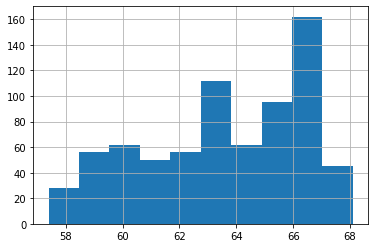

In [156]:
df.workforce_participation_rate.hist()

<AxesSubplot:>

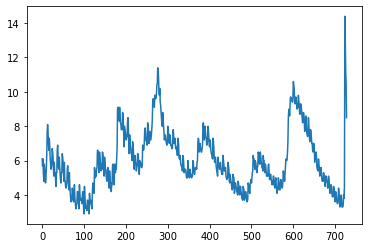

In [157]:
df.unemployment_rate.plot()

<AxesSubplot:>

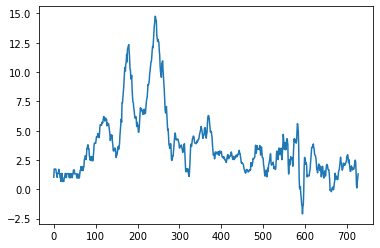

In [158]:
df.cpi_rate.plot()

<AxesSubplot:>

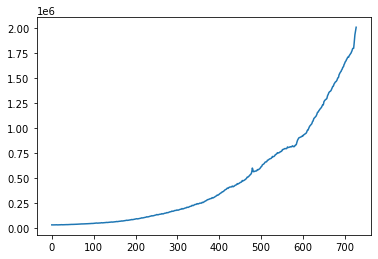

In [163]:
df.circulation.plot()